# TP ACP

In [1]:
try:
    import sklearn, numpy, matplotlib 
except ModuleNotFoundError: 
    !pip3 install --quiet sklearn numpy matplotlib
import sklearn, numpy as np, matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Définition de quelques outils 

On définit ici quelques fonctions utiles pour l'affichage des résultats, non présents dans sklearn :
- screeplot : variance expliquée en fonction des composantes principales
- CercleCorrelation : affichage du cercle des corrélations
- biplot : affichage simultané des individus et des variables dans un plan principal

In [3]:
def screeplot(Xtr, displayx = True):
    y = np.std(Xtr, axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    if displayx :
        plt.xticks(x, ["CP "+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.xlabel("CP")
    plt.title("Scree Plot")

In [4]:
def CercleCorrelation(pca,np1,np2,data,nom_features):
    plt.Circle((0,0),radius=10, color='b', fill=False)
    circle1=plt.Circle((0,0),radius=1, color='b', fill=False)
    fig = plt.gcf()
    fig.gca().add_artist(circle1)

    for idx in range(len(nom_features)):
        str1 = "CP" + str(np1)
        str2 = "CP" + str(np2)
        x = pca.components_[np1][idx]
        y = pca.components_[np2][idx]
        plt.plot([0.0,x],[0.0,y],'k-')
        plt.plot(x, y, 'rx')
        plt.annotate(nom_features[idx], xy=(x,y))
    plt.xlabel(str1 +" (%s%%)" % str(pca.explained_variance_ratio_[np1])[:4].lstrip("0."))
    plt.ylabel(str2 +" (%s%%)"% str(pca.explained_variance_ratio_[np2])[:4].lstrip("0."))
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.title("Cercle des corrélations")

In [5]:
def biplot(pca,np1,np2,data,nom_features):  
    cp1 = pca.components_[np1]
    cp2 = pca.components_[np2]
    xs = pca.transform(data)[:,np1] 
    ys = pca.transform(data)[:,np2]
    for i in range(len(cp1)):
        plt.arrow(0, 0, cp1[i]*max(xs), cp2[i]*max(ys),
                  color='r', width=0.0005, head_width=0.0025)
        plt.text(cp1[i]*max(xs)*1.2, cp2[i]*max(ys)*1.2,
                 nom_features[i], color='r')

    for i in range(len(xs)):
        plt.plot(xs[i], ys[i], 'bo')
        plt.text(xs[i]*1.2, ys[i]*1.2, i, color='b')
    plt.xlabel("CP" + str(np1) +" (%s%%)" % str(pca.explained_variance_ratio_[np1])[:4].lstrip("0."))
    plt.ylabel("CP" + str(np2) +" (%s%%)"% str(pca.explained_variance_ratio_[np2])[:4].lstrip("0."))
    plt.title("Biplot individus / variables sur les CP" +str(np1)+" et " + str(np2))
    plt.tight_layout()

# Exercice 1 : étude de propriétés de vins
Le fichier vins.csv contient les résultats d'analyses chimiques de trois classes de vins italiens, provenant de la même région mais de viticulteurs différents. Les analyses portent sur la quantification de 13 indices quantitatifs continus reliés aux vins : degré d'alcool, acide malique, présence de cendres, alcalinité des cendres, magnésium, phénols totaux, flavonoïdes, phénols non flavanoïdes, proanthocyanidines, intensité de la couleur du vin, teinte, OD280/OD315 des vins dilués et proline. Le fichier décrit un vin par ligne (sa classe et ses 13 attributs).

In [6]:
import pandas as pd 
pd.options.mode.chained_assignment = None

vins = pd.read_csv("./data/vins.csv",delimiter=",",header=None)
cat_vins = vins.loc[: , 0]
features_vins = vins.loc[:,1:vins.shape[1]]
nom_features = ['% alcool', 'acide malique', 'cendres', 'alcalinité', 'magnésium', 'phénols' , 
                'flavonoïdes', 'non flavanoïdes', 'proanthocyanidines', 'couleur', 'teinte', 
                'OD280/OD315','proline']

## ===== Votre travail : =====

### Appliquer une [ACP](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) à ces données, de deux manières :

- sur les données brutes du tableau
- sur les données normalisées, en utilisant la fonction [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de ScikitLearn
    
### Pour chacune de ces analyses :
- déterminer si l'analyse est pertinente et si oui pourquoi
- Si elle l'est effectivement, déterminer le nombre de composantes principales à retenir, interpréter les axes principaux, afficher le(s) plan(s) principal(aux) et interpréter graphiquement les résultats
    

# Exercice 2 : étude de données image
Nous étudions des données image, représentant des chiffres manuscrits. Nous utilisons pour cela la base de données standard MNIST (Mixed National Institute of Standards and Technology), très employée pour le test de nouveaux algorithmes de reconnaissance de ces chiffres. Elle est composée de 60000 images d’apprentissage et 10000 images de test. Les images en noir et blanc, normalisées centrées de 28 pixels de côté.

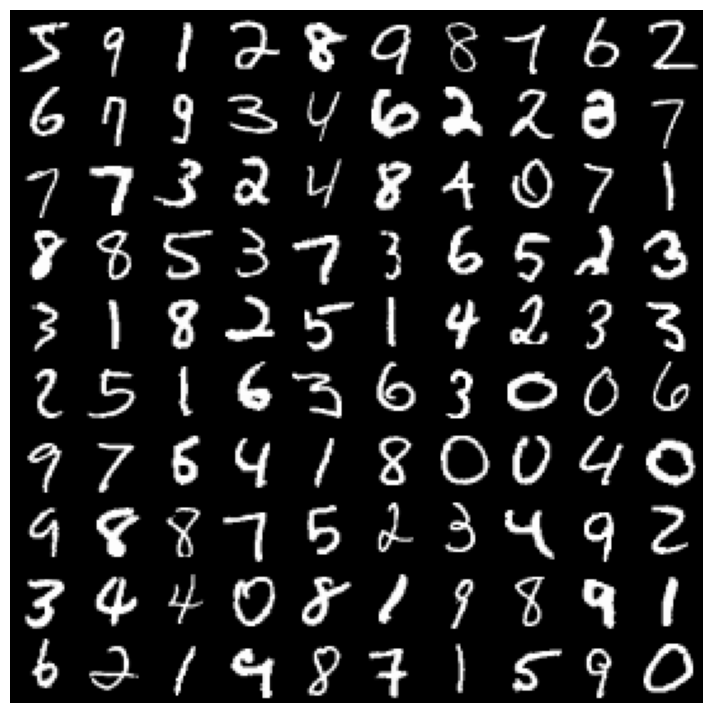

In [7]:
from sklearn.datasets import fetch_openml
import matplotlib
Xmnist, ymnist = fetch_openml('mnist_784', version=1, return_X_y=True)

def planche(X):
    plt.figure(figsize=(9,9))
    exemples = (1-np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]/255)
    size = 28
    taille = 10
    taille = min(len(exemples), taille)
    images = [exemple.reshape(size,size) for exemple in exemples]
    n_rows = (len(exemples) - 1) // taille + 1
    row_images = []
    n_empty = n_rows * taille - len(exemples)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * taille : (row + 1) * taille]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

planche(Xmnist)


L'ACP est ici utilisée pour réduire la représentation des données (un point ici est un vecteur de 28*28=784, l'espace original est donc $\mathbb{R}^{784}$). Intuitivement, on comprend bien que, de nombreux pixels étant noirs et communs à toutes les images, 784 dimensions sont inutiles.

Pour ne pas surcharger la visualisation, vous utiliserez un sous-ensemble de ${\tt nb\_digits}$ images de MNIST (code donné)
## ===== Votre travail consiste à : =====
- Calculer une ACP de ces données (normalisées ? non normalisées ? jusitifier)
- Projeter les individus dans un  plan principal (ou dans un expace 3D de composantes principales) et commenter le résultat (codes de l'affichage fournis). 
- Inférer sur le nombre de composantes principales nécessaires pour expliquer les données initiales
- Essayer de reconstruire une image donnée à partir de ses coordonnées sur les $n$ premières composantes principales (faire varier $n$) et voir la qualité de la reconstruction

In [8]:
# Utilisation d'un sous-ensemble de Xmnist (pour ne pas surcharger la visualisation)
ymnist=ymnist.astype(int)
nb_digits = 10000
s = np.arange(Xmnist.shape[0])
np.random.shuffle(s)
X0=Xmnist.to_numpy()[s]
y0=ymnist[s]
Xdata = X0[:nb_digits]
ydata = y0[:nb_digits]

In [9]:
# Fonction d'affichage sur le plan principal (n1,n2)
# x : coordonnées des individus projetés sur les composantes principales
# y : label de l'individu (c'est à dire le chiffre lu sur l'image)
# n1,n2 : numéro des composantes principales (0 : première CP,  : 2e CP...)
def AfficheCP2D (x,y, n1,n2):
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(x[:, n1], x[:, n2], c=y[:], edgecolor='none', alpha=0.5,cmap=plt.get_cmap('jet', 10), s=5)
    plt.xlabel('Composante principale '+str(n1+1))
    plt.ylabel('Composante principale '+str(n2+1))
    plt.title('MNIST')
    plt.colorbar()

from mpl_toolkits.mplot3d import Axes3D
def AfficheCP3D(x,y, n1,n2,n3):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d',elev=30, azim=134)
    ax.scatter(x[:, n1], x[:, n2], x[:, n3], c=y, cmap=plt.cm.get_cmap('jet', 30),edgecolor='k')
    ax.set_xlabel('Composante principale '+str(n1+1))
    ax.set_ylabel('Composante principale '+str(n2+1))
    ax.set_zlabel('Composante principale '+str(n3+1))
    ax.set_title('MNIST')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

